In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Read in nhl_career_per_game df from main Capstone Notebook
nhl_career_per_game = pd.read_csv("C:/Users/joshm/Documents/BrainStation/nhl_career_per_game.csv", index_col=0)
nhl_career_per_game

,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,
A.J. Greer,8.50,0.58,0.82,0.08,0.12,0.20,0.95,0.01,0.00,0.07,0.12
Aaron Downey,5.02,0.40,0.70,0.03,0.06,0.09,0.39,0.00,0.00,0.03,0.06
Aaron Ekblad,22.86,0.45,0.90,0.17,0.34,0.51,2.50,0.06,0.10,0.11,0.23
Aaron Gagnon,8.05,0.00,0.78,0.00,0.11,0.11,0.47,0.00,0.00,0.00,0.11
Aaron Johnson,14.54,0.25,0.64,0.06,0.15,0.21,0.88,0.01,0.02,0.05,0.13
...,...,...,...,...,...,...,...,...,...,...,...
Éric Gélinas,15.35,0.29,0.85,0.07,0.22,0.29,1.70,0.05,0.11,0.03,0.11
Éric Perrin,16.37,0.49,1.10,0.13,0.30,0.43,1.58,0.02,0.04,0.10,0.20
Ľubomír Višňovský,22.59,0.44,1.21,0.16,0.46,0.62,1.84,0.07,0.25,0.10,0.20


In [3]:
# importing necessary libraries and assigning train/test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# allocating X and y variables
y = nhl_career_per_game['G/GP']
X = nhl_career_per_game.drop(columns=['G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [4]:
# Instantiate a Feed Forward neural network
nhl_nn_model = Sequential()

# dense layers
nhl_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
nhl_nn_model.add(Dense(40, activation='relu'))
nhl_nn_model.add(Dense(30, activation='relu'))
nhl_nn_model.add(Dense(20, activation='relu'))
nhl_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
nhl_nn_model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
nhl_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

In [5]:
# empty list to accept loss values over epochs
mse_list = []

In [6]:
# Training for 50 epochs
history = nhl_nn_model.fit(X_train, y_train, epochs=50, verbose=True)

# Grab the prediction data
y_pred = nhl_nn_model.predict(X_test)

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 8.3510e-04 - mean_squared_error: 8.3510e-04
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 5.7995e-04 - mean_squared_error: 5.7995e-04
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 4.3233e-04 - mean_squared_error: 4.3233e-04
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 3.8867e-04 - mean_squared_error: 3.8867e-04
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 2.9678e-04 - mean_squared_error: 2.9678e-04
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 3.1380e-04 - mean_squared_error: 3.1380e-04
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 2.6259e-04 - mea

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [7]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = nhl_nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = nhl_nn_model.predict(X_test)

Train Loss: 0.0001


TypeError: unsupported format string passed to list.__format__

In [8]:
len(mse_list)

50

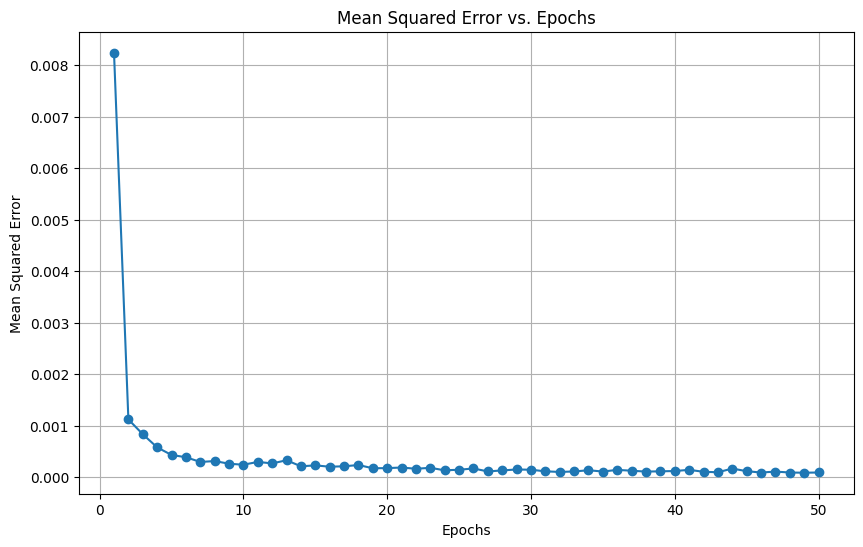

In [9]:
mse_values = [...]  # Replace [...] with your actual MSE values

# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

In [10]:
nhl_nn_model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 6.7403e-05 - mean_squared_error: 6.7403e-05


[6.740293611073866e-05, 6.740293611073866e-05]

In [ ]:
type(y_train)

In [ ]:
type(X_train)

In [ ]:
# converting X_train into a numpy array for fitting the NN model
X_train_array = X_train.values
type(X_train_array)

In [ ]:
y_pred.shape

In [ ]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

In [ ]:
X_test.shape

In [ ]:
y_pred.shape

In [ ]:
X_train_array.shape

In [ ]:
X_test['TOI/GP']

In [ ]:
y_pred.shape

In [ ]:
X_test.columns

In [ ]:
# Plot
for col in X_test.columns:
    plt.subplots(1,2, figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue") # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted') # Plot the predictions
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('G/GP')
    plt.title("Curve fitting after 51 epochs - 'polynomial'")
    
    # Error for each epoch
    plt.subplot(1,2,2)
    plt.plot(mse_list, c='orange')
    plt.title('Model error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    
    # Show
    plt.show()
    
    # Error for the one epoch
    print('Mean Squared Error (MAE) after 51 epochs: ', history.history['mean_squared_error'][-1])

#### Visualizing Predicted vs Actual for test set

In [ ]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Equality')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Plotly/plotly.graph_objects is not working in this environment. Moving along for now

In [ ]:
# # Create a DataFrame with y_test and y_pred
# import plotly.express as px 
# import plotly.graph_objects as go
# df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})

# # Plot y_test vs y_pred
# fig = px.scatter(df, x='actual goals/game', y='predicted goals/game', title='Actual vs Predicted Values', height=900, hover_name=y_test.index)
# fig.add_trace(go.Scatter(x=[df['actual goals/game'].min(), df['actual goals/game'].max()], y=[df['actual goals/game'].min(), df['actual goals/game'].max()], mode='lines', name='Perfect Prediction'))
# fig.show()

In [ ]:
y_pred = np.reshape(y_pred, (741,))
y_pred.shape

In [ ]:
# y_pred must have shape (741,)
df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df

In [ ]:
# Creating a table including Difference between Predicted and Actual 

df['Actual Goals'] = round((df['actual goals/game'] * 82), 2)
df['Predicted Goals'] = round((df['predicted goals/game'] * 82), 2)
df['Difference(Actual - Predicted)'] = df['Actual Goals'] - df['Predicted Goals']
df.sort_values(by='Predicted Goals', ascending=False).head(20)

#### Next I want to run predictions on the entire dataset and visualize

In [ ]:
y

In [ ]:
y_pred_whole

In [ ]:
mse_list[-1]

In [ ]:
y[1:]

In [ ]:
y - y_pred_whole

In [ ]:
 np.mean(np.square(y - y_pred_whole))

In [ ]:
y_pred_whole

In [ ]:
# Predict on the test data
y_pred_whole = nhl_nn_model.predict(X)
y_pred_whole = np.reshape(y_pred_whole, (2467,))


# Calculate mean squared error
mse = MeanSquaredError(y, y_pred_whole)
print("Mean Squared Error:", mse)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)